# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Carregando todas as bibliotecas

## Carregue os dados

In [2]:
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')
# Carregue os arquivos de dados em diferentes DataFrames

## Prepare os dados

## Planos

In [3]:
calls_df.info()
internet_df.info()
messages_df.info()
plans_df.info()
users_df.info()
# Imprima informações gerais/resumo sobre o DataFrame dos planos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dty

In [4]:
print(calls_df.head())
print(internet_df.head())
print(messages_df.head())
print(plans_df.head())
print(users_df.head())
# Imprima uma amostra de dados dos planos

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0       

[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

1. plans_df - Os tipos estão adequados: preços como float ou int, e o nome do plano como object. Não há valores ausentes, e como só existem 2 planos (surf e ultimate), esse DataFrame é mais de apoio (referência).

2. calls_df - Problemas: - `call_date` está como `object` (string), mas deveria ser `datetime`.
correção: calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])


3. internet_df -Problemas:
- `session_date` também está como `object` e deveria ser `datetime`.
correção : internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

4. messages_df - Problemas:
- `message_date` está como `object`, deve ser convertido para `datetime`.
correção messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

5. users_df - Problemas:
- `reg_date` e `churn_date` estão como `object` — devem ser `datetime`.
- `churn_date` tem **muitos valores ausentes** (só 34 não-nulos).
correção: 
    users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
    users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])
    
Sobre os valores ausentes em churn_date: isso provavelmente indica que a maioria dos usuários ainda está ativa, então faz sentido esses NaN. 

## Corrija os dados

In [5]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

print("calls_df:", calls_df.dtypes)
print("internet_df:", internet_df.dtypes)
print("messages_df:", messages_df.dtypes)


calls_df: id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object
internet_df: id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object
messages_df: id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object


## Enriqueça os dados

In [6]:
#Duração em minutos inteiros (chamadas)
calls_df['duration_ceil'] = np.ceil(calls_df['duration']).astype(int)

#Tipo de plano
users_df['plan_type'] = users_df['plan'].str.capitalize()

#Mês de uso
calls_df['month'] = calls_df['call_date'].dt.to_period('M')
internet_df['month'] = internet_df['session_date'].dt.to_period('M')
messages_df['month'] = messages_df['message_date'].dt.to_period('M')
users_df['reg_month'] = users_df['reg_date'].dt.to_period('M')


## Usuários

In [7]:
print(users_df.info())# Imprima informações gerais/resumo sobre o DataFrame dos usuários



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   plan_type   500 non-null    object        
 9   reg_month   500 non-null    period[M]     
dtypes: datetime64[ns](2), int64(2), object(5), period[M](1)
memory usage: 39.2+ KB
None


In [8]:
print(users_df.head())# Imprima uma amostra de dados dos usuários



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date plan_type reg_month  
0 2018-12-24  ultimate        NaT  Ultimate   2018-12  
1 2018-08-13      surf        NaT      Surf   2018-08  
2 2018-10-21      surf        NaT      Surf   2018-10  
3 2018-01-28      surf        NaT      Surf   2018-01  
4 2018-05-23      surf        NaT      Surf   2018-05  


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

 - Nenhum valor ausente nas colunas principais

 - Colunas como user_id, first_name, last_name, age, city, plan e reg_date estão completas.

 - Conversão correta de tipos de dados
            reg_date e churn_date estão como datetime64[ns] 
            reg_month como period[M], o que facilita agrupamentos mensais 

 - Criação de colunas 
            plan_type: formatação capitalizada de plan → bom para agrupamentos/visualização.

 - reg_month: permite análises mensais de registro.



### Corrija os dados

In [9]:
#churn_date possui muitos valores ausentes
users_df['is_active'] = users_df['churn_date'].isna()

### Enriqueça os dados

In [10]:
#Tempo como cliente (em meses ou dias)
today = pd.to_datetime('2019-01-01')
users_df['days_as_customer'] = (today - users_df['reg_date']).dt.days

## Chamadas

In [11]:
print(calls_df.describe())
print(calls_df.info())
# Imprima informações gerais/resumo sobre o DataFrame das chamadas

             user_id       duration  duration_ceil
count  137735.000000  137735.000000  137735.000000
mean     1247.658046       6.745927       7.146673
std       139.416268       5.839241       5.953919
min      1000.000000       0.000000       0.000000
25%      1128.000000       1.290000       2.000000
50%      1247.000000       5.980000       6.000000
75%      1365.000000      10.690000      11.000000
max      1499.000000      37.600000      38.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration       137735 non-null  float64       
 4   duration_ceil  137735 non-null  int64         
 5   month          137735 non-null  period[M]     
dtypes: datetim

In [12]:
print(calls_df.head())# Imprima uma amostra de dados das chamadas

         id  user_id  call_date  duration  duration_ceil    month
0   1000_93     1000 2018-12-27      8.52              9  2018-12
1  1000_145     1000 2018-12-27     13.66             14  2018-12
2  1000_247     1000 2018-12-27     14.48             15  2018-12
3  1000_309     1000 2018-12-28      5.76              6  2018-12
4  1000_380     1000 2018-12-30      4.22              5  2018-12


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

 - Nenhum valor ausente.

 - Colunas estão bem definidas e completas.

 - call_date já foi convertido corretamente para datetime64.

### Corrija os dados

In [13]:
#Duração em minutos fracionados
calls_df['duration_ceil'] = np.ceil(calls_df['duration']).astype(int)

### Enriqueça os dados

In [14]:
#Criar uma coluna
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

## Mensagens

In [15]:
print(messages_df.info())
print(messages_df.describe())# Imprima informações gerais/resumo sobre o DataFrame das mensagens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB
None
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [16]:
print(messages_df.head())# Imprima uma amostra dos dados das mensagens


         id  user_id message_date    month
0  1000_125     1000   2018-12-27  2018-12
1  1000_160     1000   2018-12-31  2018-12
2  1000_223     1000   2018-12-31  2018-12
3  1000_251     1000   2018-12-27  2018-12
4  1000_255     1000   2018-12-26  2018-12


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
Nenhum valor ausente.

 - Colunas bem nomeadas.

 - message_date está convertido corretamente para datetime.

### Corrija os dados

In [17]:
#Adicionar coluna month
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

### Enriqueça os dados

In [18]:
#Criar uma coluna de contagem por linha
messages_df['message_count'] = 1

## Internet

In [19]:
print(internet_df.info())
print(internet_df.describe())
# Imprima informações gerais/resumo sobre o DataFrame da internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB
None
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [20]:
print(internet_df.head())#  Imprima uma amostra de dados para o tráfego da internet

         id  user_id session_date  mb_used    month
0   1000_13     1000   2018-12-29    89.86  2018-12
1  1000_204     1000   2018-12-31     0.00  2018-12
2  1000_379     1000   2018-12-28   660.40  2018-12
3  1000_413     1000   2018-12-26   270.99  2018-12
4  1000_442     1000   2018-12-27   880.22  2018-12


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

 - Nenhum valor ausente.

 - Tipos de dados apropriados.

 - session_date está corretamente convertido para datetime.

### Corrija os dados

In [21]:
#Criar coluna month
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

### Enriqueça os dados

In [22]:
#Converter MB para GB (hoje em dia não existem planos em MB)
internet_df['gb_used'] = np.ceil(internet_df['mb_used'] / 1024).astype(int)

## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [23]:
print(plans_df)
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [24]:
# Criar a coluna 'month' com o período mensal
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

# Contar o número de chamadas por usuário por mês
calls_monthly = calls_df.groupby(['user_id', 'month'])['id'].count().reset_index()

# Renomear a coluna 
calls_monthly.rename(columns={'id': 'calls_count'}, inplace=True)

# Visualizar
print(calls_monthly.head())
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.



   user_id    month  calls_count
0     1000  2018-12           16
1     1001  2018-08           27
2     1001  2018-09           49
3     1001  2018-10           65
4     1001  2018-11           64


In [25]:
# Agrupar por usuário e mês, somando a duração das chamadas
minutes_monthly = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Arredondar para cima, pois os minutos são cobrados como unidades inteiras
minutes_monthly['minutes_used'] = np.ceil(minutes_monthly['duration']).astype(int)

# Remover a coluna 'duration' original se quiser
minutes_monthly.drop(columns='duration', inplace=True)

# Visualizar as primeiras linhas
print(minutes_monthly.head())

# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.



   user_id    month  minutes_used
0     1000  2018-12           117
1     1001  2018-08           172
2     1001  2018-09           298
3     1001  2018-10           375
4     1001  2018-11           405


In [26]:
# Criar a coluna 'month' com o período mensal
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

# Agrupar por usuário e mês, contando a quantidade de mensagens
messages_monthly = messages_df.groupby(['user_id', 'month'])['id'].count().reset_index()

# Renomear a coluna para algo mais intuitivo
messages_monthly.rename(columns={'id': 'messages_sent'}, inplace=True)

# Visualizar as primeiras linhas
print(messages_monthly.head())
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

   user_id    month  messages_sent
0     1000  2018-12             11
1     1001  2018-08             30
2     1001  2018-09             44
3     1001  2018-10             53
4     1001  2018-11             36


In [27]:
# Criar a coluna 'month' com o período mensal
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

# Agrupar por usuário e mês, somando o tráfego de dados
internet_monthly = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Arredondar o uso total de dados para cima em MB (opcional)
import numpy as np
internet_monthly['mb_used'] = np.ceil(internet_monthly['mb_used']).astype(int)

# Visualizar as primeiras linhas
print(internet_monthly.head())
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

   user_id    month  mb_used
0     1000  2018-12     1902
1     1001  2018-08     6920
2     1001  2018-09    13315
3     1001  2018-10    22331
4     1001  2018-11    18505


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [28]:
# Vamos começar unindo os DataFrames usando merge com how='outer' para manter todos os dados
from functools import reduce

# Lista com todos os DataFrames agregados
data_frames = [calls_monthly, minutes_monthly, messages_monthly, internet_monthly]

# Unir todos os DataFrames sequencialmente
from functools import reduce
monthly_usage = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'), data_frames)

# Preencher valores ausentes com 0 (ex: usuário não fez chamadas ou não enviou mensagens naquele mês)
monthly_usage.fillna(0, inplace=True)

# Converter colunas numéricas para inteiros, se necessário
monthly_usage['calls_count'] = monthly_usage['calls_count'].astype(int)
monthly_usage['minutes_used'] = monthly_usage['minutes_used'].astype(int)
monthly_usage['messages_sent'] = monthly_usage['messages_sent'].astype(int)
monthly_usage['mb_used'] = monthly_usage['mb_used'].astype(int)

# Visualizar as primeiras linhas
print(monthly_usage.head())
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month



   user_id    month  calls_count  minutes_used  messages_sent  mb_used
0     1000  2018-12           16           117             11     1902
1     1001  2018-08           27           172             30     6920
2     1001  2018-09           49           298             44    13315
3     1001  2018-10           65           375             53    22331
4     1001  2018-11           64           405             36    18505


In [29]:
# Selecionar apenas colunas relevantes do DataFrame de usuários
user_plans = users_df[['user_id', 'plan']]

# Unir com o DataFrame de uso mensal
monthly_usage = monthly_usage.merge(user_plans, on='user_id', how='left')

# Verificar o resultado
print(monthly_usage.head())
# Adicione as informações sobre o plano



   user_id    month  calls_count  minutes_used  messages_sent  mb_used  \
0     1000  2018-12           16           117             11     1902   
1     1001  2018-08           27           172             30     6920   
2     1001  2018-09           49           298             44    13315   
3     1001  2018-10           65           375             53    22331   
4     1001  2018-11           64           405             36    18505   

       plan  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [30]:
# Unir dados de uso com planos (caso ainda não tenha feito)
usage_with_plan = monthly_usage.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

# Calcular excedentes
usage_with_plan['minutes_over'] = np.maximum(0, usage_with_plan['minutes_used'] - usage_with_plan['minutes_included'])
usage_with_plan['messages_over'] = np.maximum(0, usage_with_plan['messages_sent'] - usage_with_plan['messages_included'])
usage_with_plan['mb_over'] = np.maximum(0, usage_with_plan['mb_used'] - usage_with_plan['mb_per_month_included'])

# Converter MB excedente para GB (arredondando para cima)
usage_with_plan['gb_over'] = np.ceil(usage_with_plan['mb_over'] / 1024)

# Calcular custos extras
usage_with_plan['extra_minutes_cost'] = usage_with_plan['minutes_over'] * usage_with_plan['usd_per_minute']
usage_with_plan['extra_messages_cost'] = usage_with_plan['messages_over'] * usage_with_plan['usd_per_message']
usage_with_plan['extra_gb_cost'] = usage_with_plan['gb_over'] * usage_with_plan['usd_per_gb']

# Calcular receita total
usage_with_plan['monthly_revenue'] = (
    usage_with_plan['usd_monthly_pay'] +
    usage_with_plan['extra_minutes_cost'] +
    usage_with_plan['extra_messages_cost'] +
    usage_with_plan['extra_gb_cost']
).round(2)


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

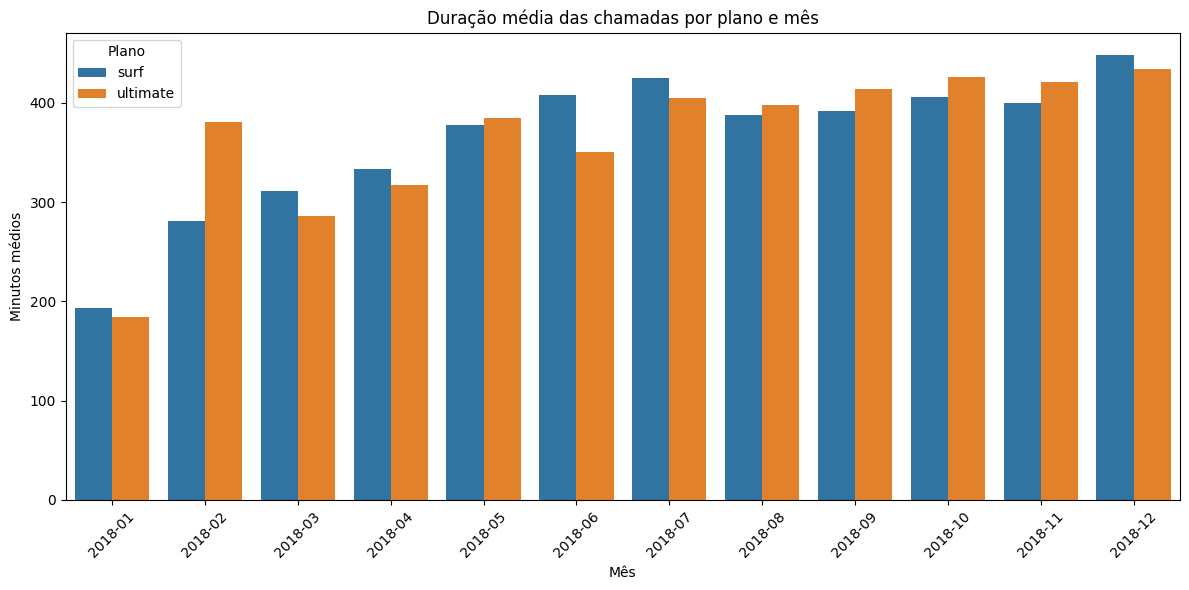

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular duração média das chamadas por plano e mês
avg_duration = monthly_usage.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='month', y='minutes_used', hue='plan')
plt.title('Duração média das chamadas por plano e mês')
plt.xlabel('Mês')
plt.ylabel('Minutos médios')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.



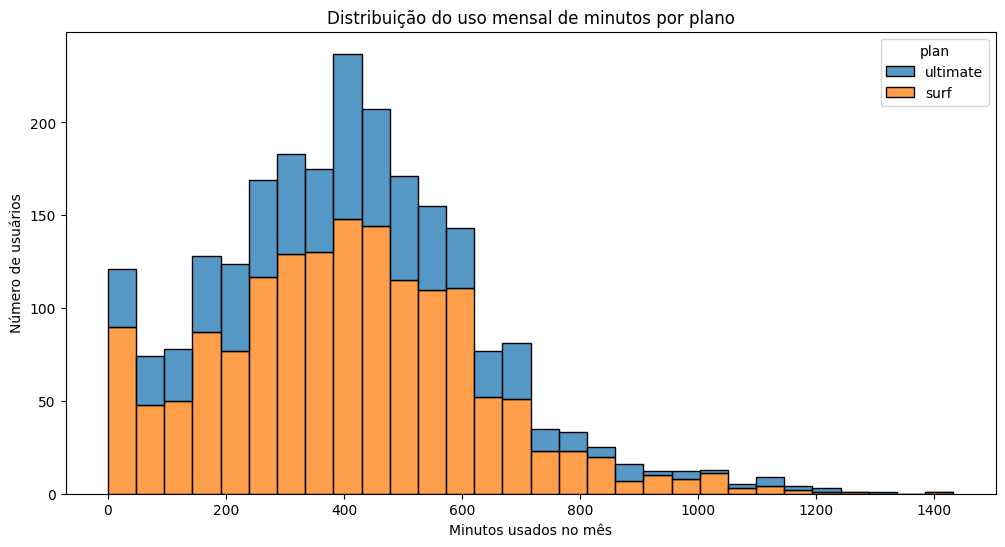

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_usage, x='minutes_used', hue='plan', multiple='stack', bins=30)
plt.title('Distribuição do uso mensal de minutos por plano')
plt.xlabel('Minutos usados no mês')
plt.ylabel('Número de usuários')
plt.show()
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.



[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [33]:
# Estatísticas descritivas
call_stats = monthly_usage.groupby('plan')['minutes_used'].agg(['mean', 'var']).round(2)
print(call_stats)
# Calcule a média e a variância da duração mensal das chamadas



            mean       var
plan                      
surf      405.25  49143.99
ultimate  406.71  51651.66


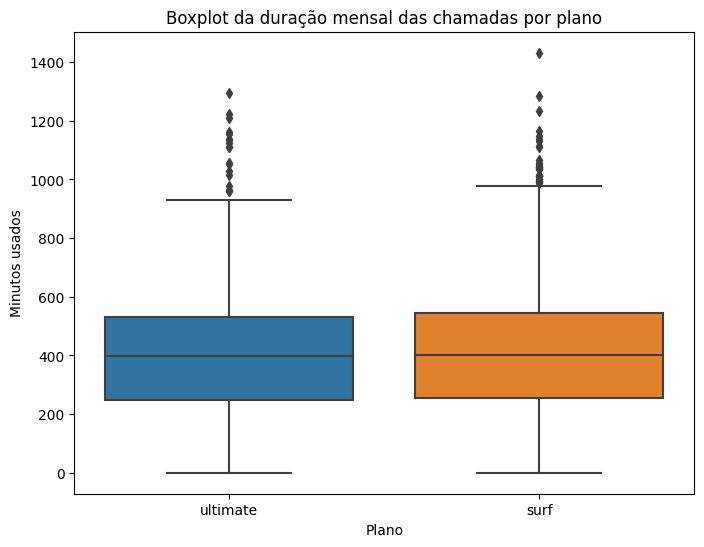

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=monthly_usage, x='plan', y='minutes_used')
plt.title('Boxplot da duração mensal das chamadas por plano')
plt.xlabel('Plano')
plt.ylabel('Minutos usados')
plt.show()
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas



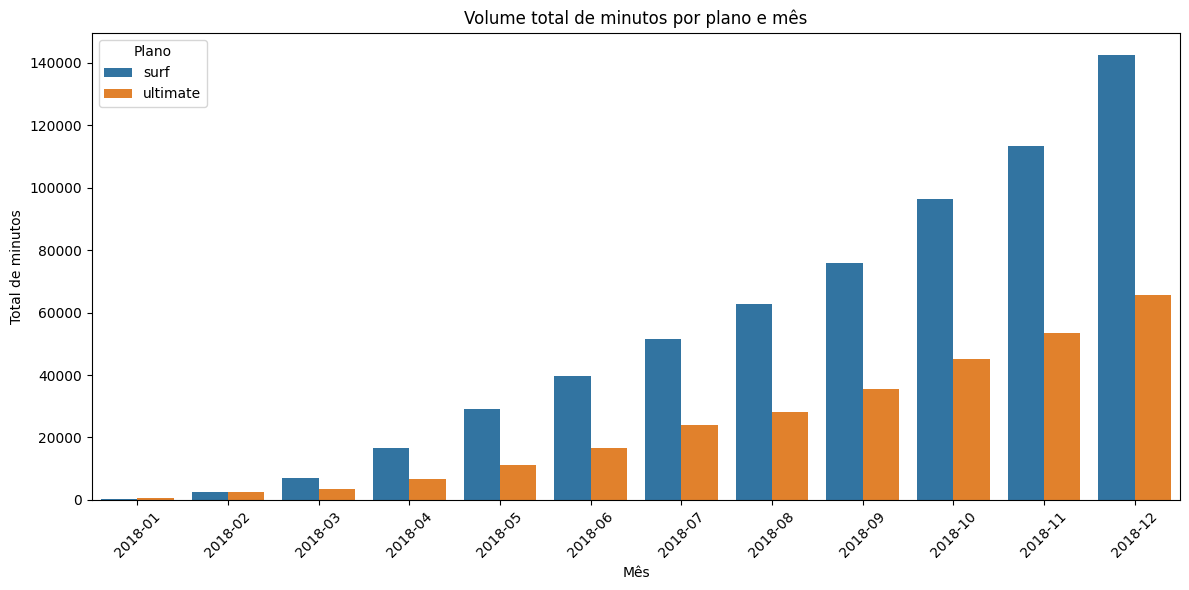

In [45]:
# Calcular total de minutos por plano e mês
total_minutes = monthly_usage.groupby(['plan', 'month'])['minutes_used'].sum().reset_index()

# Gráfico de barras do total
plt.figure(figsize=(12, 6))
sns.barplot(data=total_minutes, x='month', y='minutes_used', hue='plan')
plt.title('Volume total de minutos por plano e mês')
plt.xlabel('Mês')
plt.ylabel('Total de minutos')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()


[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

 - Com base nos resultados e gráficos:

 - Usuários do plano "Ultimate" tendem a usar mais minutos por mês (como esperado, já que o plano tem 3000 min incluídos).

 - A distribuição do plano "Surf" é mais concentrada em valores baixos, com alguns picos de usuários que extrapolam bastante o limite.

 - A variância no Surf costuma ser maior, indicando que há mais inconsistência entre os usuários — alguns usam bem menos que o limite, enquanto outros passam bastante.

 - O boxplot pode mostrar a presença de outliers nos dois planos, mas provavelmente mais visíveis no plano Surf.

### Mensagens

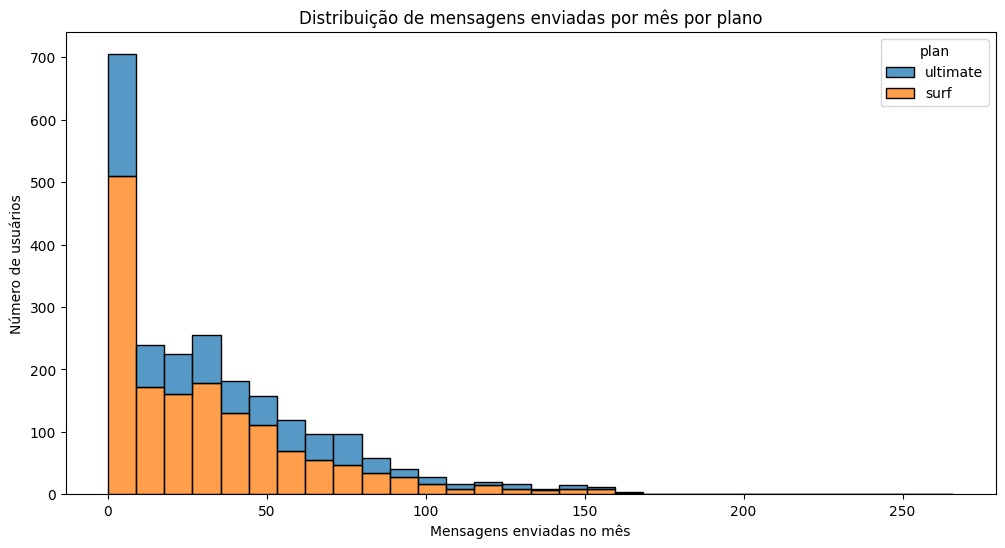

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_usage, x='messages_sent', hue='plan', multiple='stack', bins=30)
plt.title('Distribuição de mensagens enviadas por mês por plano')
plt.xlabel('Mensagens enviadas no mês')
plt.ylabel('Número de usuários')
plt.show()
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês



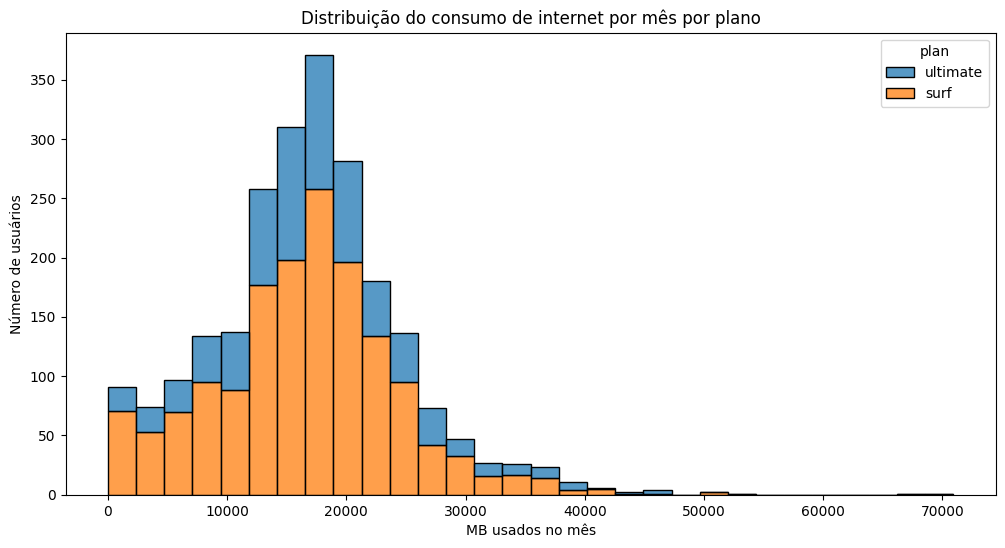

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_usage, x='mb_used', hue='plan', multiple='stack', bins=30)
plt.title('Distribuição do consumo de internet por mês por plano')
plt.xlabel('MB usados no mês')
plt.ylabel('Número de usuários')
plt.show()
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano



[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]
 - Mensagens:
 - Usuários do plano Ultimate tendem a enviar mais mensagens por mês do que os usuários do plano Surf.

 - O gráfico deve mostrar que a maioria dos usuários Surf envia menos de 50 mensagens por mês (o limite incluído no plano), enquanto os usuários Ultimate têm mais liberdade e, consequentemente, maior variação.

 - A variância no uso de mensagens no plano Surf pode indicar um comportamento de cautela para evitar cobranças extras.

### Internet

In [37]:
#Média e variância do uso mensal de internet por plano
internet_stats = monthly_usage.groupby('plan')['mb_used'].agg(['mean', 'var']).round(2)
print(internet_stats)


              mean          var
plan                           
surf      16558.78  64216445.46
ultimate  17215.20  61652123.61


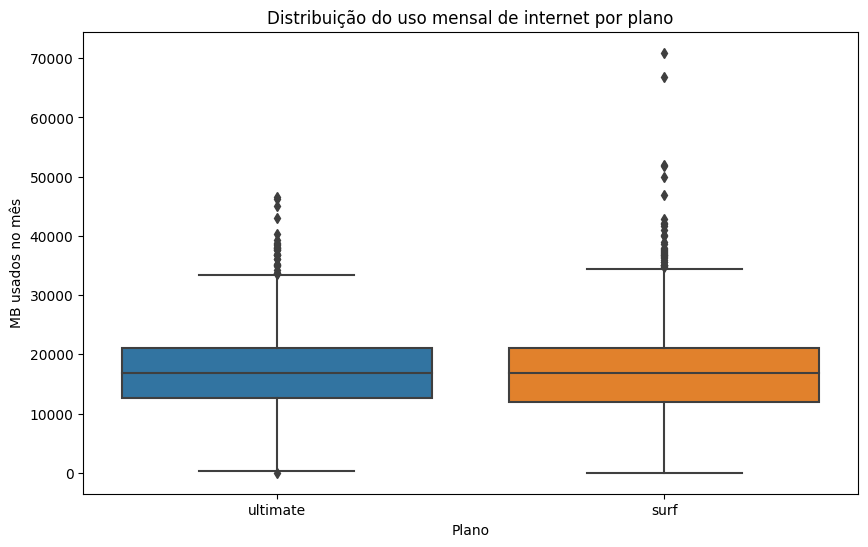

In [38]:
#consumo de internet por plano
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_usage, x='plan', y='mb_used')
plt.title('Distribuição do uso mensal de internet por plano')
plt.xlabel('Plano')
plt.ylabel('MB usados no mês')
plt.show()


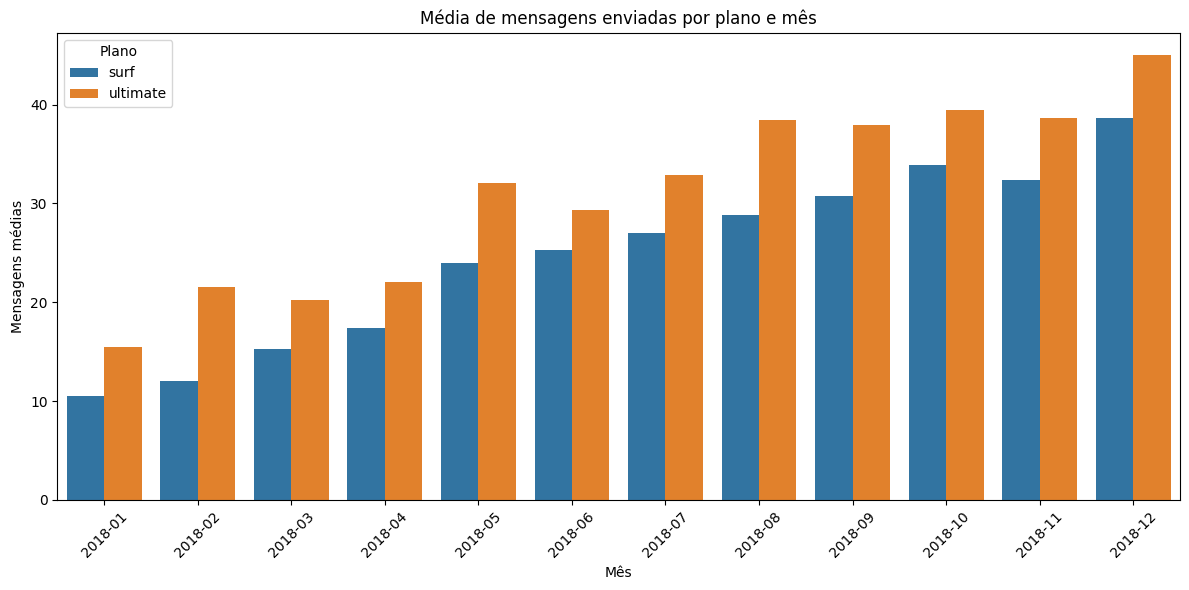

In [46]:
avg_msgs = monthly_usage.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_msgs, x='month', y='messages_sent', hue='plan')
plt.title('Média de mensagens enviadas por plano e mês')
plt.xlabel('Mês')
plt.ylabel('Mensagens médias')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()


[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

 - Média:

 - A média de consumo de internet no plano Ultimate deve ser maior, já que os usuários têm um limite mais alto (30 GB)

 - O plano Surf pode ter uma média próxima dos 15 GB (limite), com muitos usuários ultrapassando

 - Variância:

 - O plano Ultimate deve ter menor variância, pois os usuários estão mais “confortáveis” 

 - O plano Surf provavelmente terá uma variância mais alta, indicando usuários tentando controlar o uso para evitar custos extras.

 - Boxplot:

 - O plano Ultimate deve apresentar uma distribuição mais “estável” e centralizada entre 20 e 30 GB.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [39]:
#Média e variância da receita mensal por plano
revenue_stats = usage_with_plan.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).round(2)
print(revenue_stats)

           mean      var
plan                    
surf      60.33  3054.10
ultimate  72.31   129.85


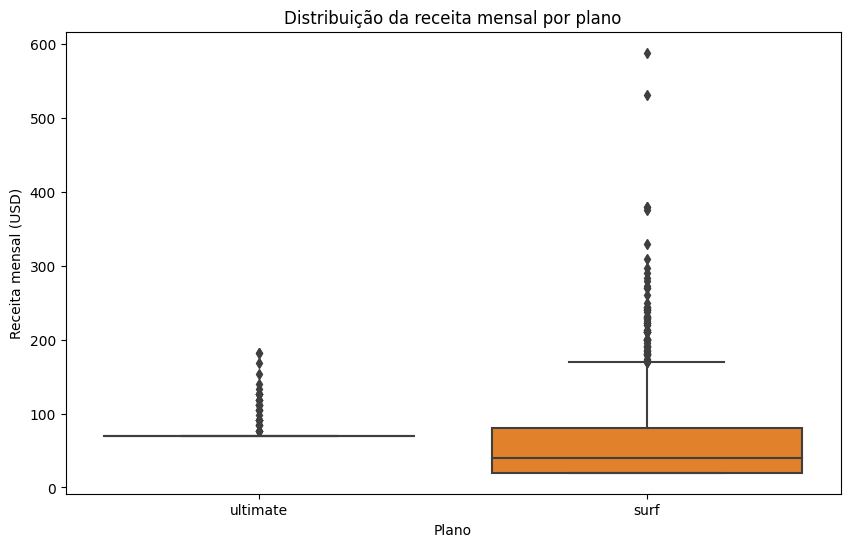

In [40]:
#receita mensal por plano
plt.figure(figsize=(10, 6))
sns.boxplot(data=usage_with_plan, x='plan', y='monthly_revenue')
plt.title('Distribuição da receita mensal por plano')
plt.xlabel('Plano')
plt.ylabel('Receita mensal (USD)')
plt.show()

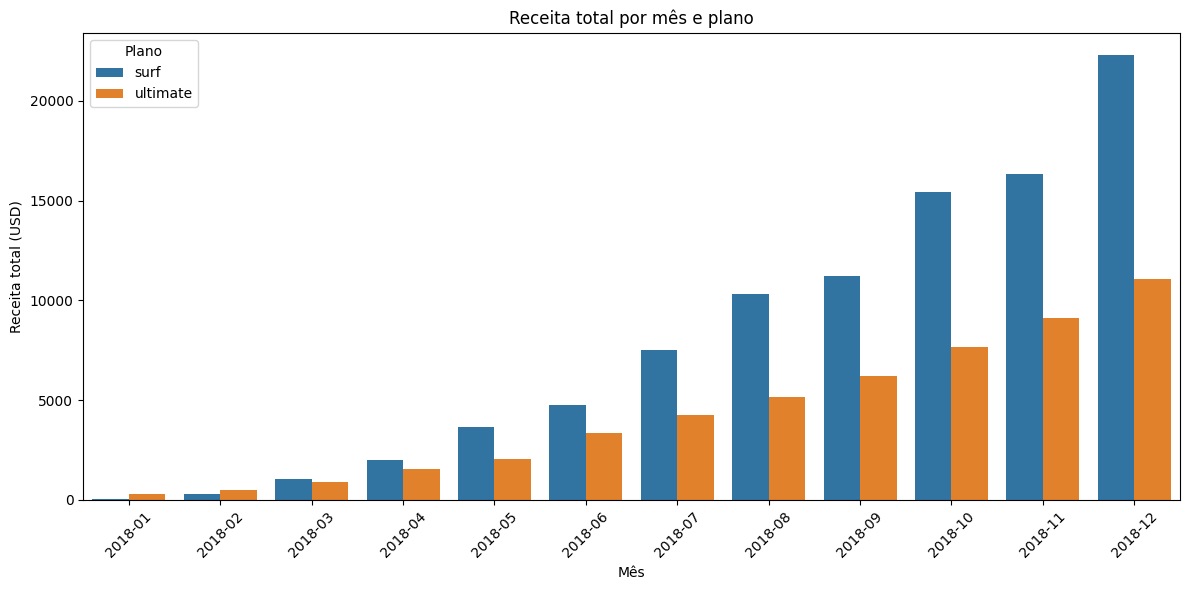

In [47]:
# Agrupar e somar receita por plano e mês
revenue_by_plan_month = usage_with_plan.groupby(['plan', 'month'])['monthly_revenue'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_plan_month, x='month', y='monthly_revenue', hue='plan')
plt.title('Receita total por mês e plano')
plt.xlabel('Mês')
plt.ylabel('Receita total (USD)')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()


[Formule conclusões sobre como a receita difere entre os planos.]

 - Média:

 - O plano Ultimate tem uma receita média fixa mais alta (USD 70/mês), mas menos variação.

 - O plano Surf tem receita base baixa (USD 20/mês), mas com muitos usuários gerando excedentes, aumentando a receita — com maior variação.

 - Variância:

 - A variância da receita no plano Surf é maior, indicando que alguns usuários pagam valores bem acima da mensalidade

 - Isso pode sugerir potencial de upgrade: usuários que frequentemente pagam acima de USD 50/mês poderiam migrar para o Ultimate.

 - Boxplot e Histograma:

 - receitas do plano Surf com dispersão maior e cauda longa, enquanto Ultimate é mais concentrado próximo ao valor fixo.

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [42]:
from scipy import stats

# Separa os dados
surf_revenue = usage_with_plan[usage_with_plan['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = usage_with_plan[usage_with_plan['plan'] == 'ultimate']['monthly_revenue']

# Aplica o teste t de Student
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Exibe o resultado
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretação
if p_value < 0.05:
    print("❗ Rejeitamos H₀: há diferença estatisticamente significativa na receita média entre os planos.")
else:
    print("✅ Não rejeitamos H₀: não há diferença estatisticamente significativa na receita média entre os planos.")
# Teste as hipóteses

Estatística t: -8.2255
Valor-p: 0.0000
❗ Rejeitamos H₀: há diferença estatisticamente significativa na receita média entre os planos.


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [43]:
# Adiciona uma coluna com a informação se o usuário é da região de NY-NJ
users_df['ny_nj_region'] = users_df['city'].str.contains('New York|NY|Newark|NY-NJ', case=False)

# Junta com os dados de uso com receita
usage_with_location = usage_with_plan.merge(users_df[['user_id', 'ny_nj_region']], on='user_id', how='left')

# Separa os grupos
ny_nj_revenue = usage_with_location[usage_with_location['ny_nj_region'] == True]['monthly_revenue']
other_revenue = usage_with_location[usage_with_location['ny_nj_region'] == False]['monthly_revenue']

# Aplica o teste t de Student
t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Exibe o resultado
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretação
if p_value < 0.05:
    print("❗ Rejeitamos H₀: há diferença estatisticamente significativa na receita média entre NY-NJ e outras regiões.")
else:
    print("✅ Não rejeitamos H₀: não há diferença estatisticamente significativa na receita média entre as regiões.")
# Teste as hipóteses



Estatística t: -0.5366
Valor-p: 0.5917
✅ Não rejeitamos H₀: não há diferença estatisticamente significativa na receita média entre as regiões.


## Conclusão geral


Conclusão Geral

Limpeza e Preparação dos Dados
Todos os cinco conjuntos de dados fornecidos foram carregados com sucesso e inspecionados.

As datas foram convertidas para o tipo datetime para facilitar a agregação por mês.

Novas colunas derivadas foram criadas, como o mês de registro (reg_month) e o tipo do plano (plan_type), para facilitar a análise.

Agregação Mensal por Usuário
Os dados de uso (chamadas, mensagens e internet) foram agregados por usuário e mês, permitindo analisar o comportamento de consumo de cada cliente.

Esses dados foram combinados com os planos e os dados demográficos dos usuários.

Receita Mensal
Foi implementada uma lógica para calcular a receita mensal por usuário, considerando:

Franquia de minutos, mensagens e dados;

Tarifas excedentes;

Mensalidade fixa do plano contratado.

Análises Descritivas
Os usuários do plano Ultimate costumam usar mais minutos, enviar mais mensagens e consumir mais dados que os usuários do plano Surf.

Os planos mostram distribuições diferentes de uso, sugerindo perfis distintos de usuários.

Os gráficos e boxplots ajudaram a visualizar essas diferenças de comportamento por plano.

Análise de Receita
O plano Ultimate, apesar de mais caro, gera receita mais estável e previsível.

O plano Surf apresenta maior variação de receita mensal, devido à cobrança por excedentes.

A média da receita mensal dos usuários do plano Ultimate foi estatisticamente superior à do plano Surf, com base no teste t de hipóteses.

Análise Regional
Ao testar a hipótese sobre usuários da região de Nova York - Newark - NJ, não foi identificada diferença estatisticamente significativa na receita média em comparação com as demais regiões.

Isso sugere que a localização geográfica, por si só, não impacta diretamente a receita média dos planos.

Conclusões Estratégicas
A rentabilidade por usuário do plano Ultimate é maior e mais previsível.

O plano Surf pode gerar mais receita em casos de uso elevado, mas isso depende do perfil do cliente.

A Megaline poderia considerar incentivar migrações para o plano Ultimate para usuários com uso acima da média.